<a href="https://colab.research.google.com/github/hc417tw/118S_Course/blob/main/Coding_Exercise_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

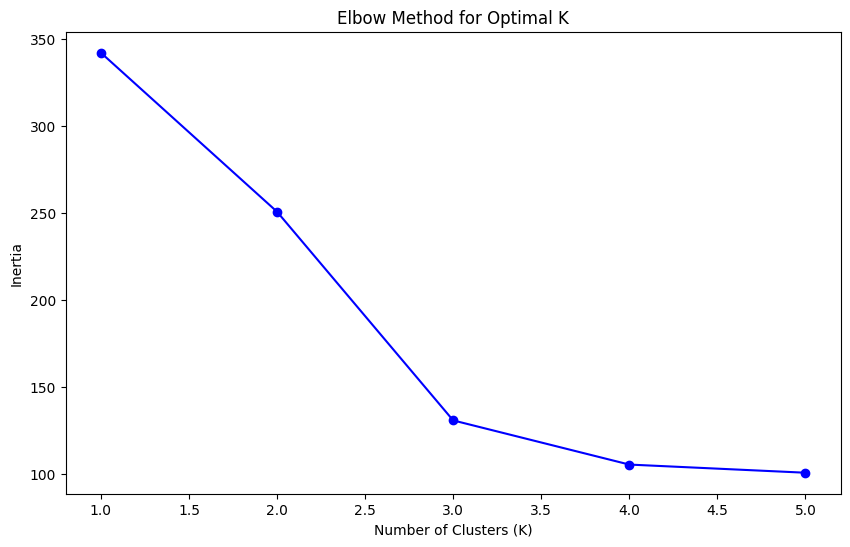

Cluster Characteristics:
         annual_spending  purchase_frequency    age
cluster                                            
0                1460.53               13.33  40.07
1                 797.18                3.77  52.05
2                 649.08                5.49  29.95

Cluster 0 Strategy:
High-spending customers: Offer exclusive promotions or loyalty rewards.

Cluster 1 Strategy:
Low-engagement customers: Send personalized re-engagement campaigns.

Cluster 2 Strategy:
Low-engagement customers: Send personalized re-engagement campaigns.


In [29]:
# Part 3. of the Coding Exercise - ML Basics
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Generate the data by asking Open AI, ChatGPT, to generate 150 different data row for each column.
data = {
'annual_spending': [111,842,1560,432,1785,920,305,1210,675,1490,510,880,340,1340,760,1920,615,2367, 3023, 222, 4971,1045,420,1680,540,1395,730,1585,390,1180,645,1740,505,920,1475,360,1255,810,1650,470,1385,690,1520,580,1715,410,1105,745,1840,530,1325,605,1505,455,1195,720,1605,385,1400,665,1760,515,1245,795,1695,430,1085,685,1550,560,1375,725,1825,495,1150,770,1675,405,1435,650,1730,520,1285,710,1590,460,1220,780,1800,540,1360,690,1620,420,1175,755,1705,485,1305,640,1755,515,1215,735,1665,395,1450,680,1785,505,1335,720,1610,450],
'purchase_frequency': [7,14,3,16,9,2,11,6,13,4,8,15,3,12,7,18,5,10,3,16,4,12,6,14,2,11,5,17,4,8,13,3,11,7,15,4,12,6,14,5,16,3,10,6,17,4,12,5,14,3,11,6,15,2,13,5,16,4,11,7,15,3,10,6,14,4,12,6,17,3,10,7,15,2,13,5,16,4,11,6,14,3,10,7,17,4,12,6,15,3,10,6,16,3,12,5,16,4,11,6,15,2,13,5,17,4,12,6,14,3,11,6,15,2],
'age': [24,39,51,27,44,36,41,29,47,33,26,38,55,31,48,42,23,37,59,34,28,46,32,40,52,35,27,43,30,49,36,58,41,29,33,45,50,26,38,31,42,54,35,28,47,30,39,44,41,56,37,29,34,53,40,27,48,32,45,36,43,51,38,30,46,28,35,49,41,33,44,26,39,57,34,31,47,29,42,37,50,55,36,27,45,30,41,48,38,52,34,29,43,58,37,26,46,31,40,44,35,53,42,28,49,32,36,27,41,54,24,38,45,33],
'region': ['North','South','West','North','West','South','North','West','East','South','North','West','South','East','North','West','South','East','North','West','South','East','North','West','South','East','North','West','South','East','North','West','South','East','North','West','South','East','North','West','South','East','North','West','South','East','North','West','South','East','North','West','South','East','North','West','South','East','North','West','South','East','North','West','South','East','North','West','South','East','North','West','South','East','North','West','South','East','North','West','South','East','North','West','South','East','North','West','South','East','North','West','South','East','North','West','South','East','North','West','South','North','West','South','East','North','West','South','East','North','West','South','East','North']
}
df = pd.DataFrame(data)
# Preprocess data: Select numerical features and scale them
features = ['annual_spending', 'purchase_frequency', 'age']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Determine optimal number of clusters using elbow method
inertia = []
K = range(1, 6)
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)
# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.savefig('elbow_plot.png')
plt.show()
# Apply K-Means with optimal K (e.g., 3 based on elbow method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)
# Analyze clusters
cluster_summary = df.groupby('cluster')[features].mean().round(2)
print("Cluster Characteristics:")
print(cluster_summary)
# Example of targeted strategies
for cluster in range(optimal_k):
  print(f"\nCluster {cluster} Strategy:")
  if cluster_summary.loc[cluster, 'annual_spending'] > 800:
    print("High-spending customers: Offer exclusive promotions or loyalty rewards.")
  elif cluster_summary.loc[cluster, 'purchase_frequency'] > 100:
    print("Frequent buyers: Provide bulk discounts or subscription plans.")
  else:
    print("Low-engagement customers: Send personalized re-engagement campaigns.")
# Save cluster assignments to CSV
df.to_csv('customer_segments.csv', index=False)